## Introduction 

Dans mon article sur [le r√©seau √† un neurone (r√©gression logistique)](https://thedatafrog.com/fr/regression-logistique/), nous avons construit le r√©seau de neurones le plus simple possible pour classer un √©chantillon 1D en deux cat√©gories. Nous avons aussi vu que ce r√©seau √† un seul neurone est √©quivalent √† une r√©gression logistique. Enfin, nous avons appris ce qu'est la fonction d'activation sigmo√Øde. 

Aujourd'hui, nous allons faire le m√™me exercice en 2D, et vous apprendrez que: 

* la r√©gression logistique fonctionne aussi en 2D, et en fait quelque soit le nombre de dimensions; 
* la r√©gression logistique est un **algorithme lin√©aire**;
* Il est souvent n√©cessaire de rajouter d'utiliser un algorithme non lin√©aire pour d√©crire et √©chantillon de donn√©es, et donc d'aller au del√† de la r√©gression logistique. 

**Pr√©-requis:**

Pour pouvoir suivre ce tuto, il vous faut conna√Ætre la r√©gression logistique √† 1D, ou suivre [mon tuto √† ce sujet](https://thedatafrog.com/fr/regression-logistique/).

## Ex√©cution de ce tuto

La premi√®re possibilit√© est de [l'ouvrir sur la plateforme Colaboratory de google.](https://colab.research.google.com/github/cbernet/maldives/blob/master/one_neuron/logistic_regression_2d_fr.ipynb)

Si vous pr√©f√©rez ex√©cuter le code sur votre machine: 

* Installez [Anaconda](https://thedatafrog.com/installer-anaconda-data-science-python/) pour python 3.X, si ce n'est pas d√©j√† fait
* T√©l√©chargez [le d√©p√¥t contenant ce notebook](https://github.com/cbernet/maldives/archive/master.zip)
* D√©compressez le, par exemple vers `Downloads/maldives-master`
* Lancez jupyter notebook
* Depuis la page principale, naviguez vers `Downloads/maldives-master/one_neuron`
* Ouvrez `logistic_regression_2d_fr.ipynb`

Mais bien s√ªr, vous pouvez vous contenter de continuer votre lecture sur ce site. 

Tout d'abord, importons les packages dont nous aurons besoin:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Nous engendrerons notre √©chantillon nous-m√™mes, 
# avec nsamples exemples dans chaque cat√©gorie.
nexamples = 500

## Cr√©ation de l'√©chantillon

Nous allons cr√©er un √©chantillon d'exemples avec chacun deux valeurs x1 et x2, dans deux cat√©gories. 
Pour la cat√©gorie 0, la distribution de densit√© de probabilit√© sous-jacente est une Gaussienne en deux dimensions centr√©e sur (0,0), de largeur 1 suivant les deux directions. Pour la cat√©gorie 1, la Gaussienne est centr√©e sur (2,2). Nous assignerons l'√©tiquette 0 √† la cat√©gorie 0, et l'√©tiquette 1 √† la cat√©gorie 1. 


In [3]:
normal = np.random.multivariate_normal
# largeur au carr√©: 
s2 = 1
# ci-dessous, nous donnons les coordonn√©es de la 
# moyenne de la Gaussienne comme premier argument, 
# et ensuite la matrice de covariance qui d√©crit sa largeur.
# nous engendrons nexamples exemples dans chaque cat√©gorie.
sgx0 = normal([0.,0.], [[s2, 0.], [0.,s2]], nexamples)
sgx1 = normal([2.,2.], [[s2, 0.], [0.,s2]], nexamples)
# cr√©ation des √©tiquettes pour chaque cat√©gorie. 
sgy0 = np.zeros((nexamples,))
sgy1 = np.ones((nexamples,))

Voici la distribution des examples dans chaque cat√©gorie: 

Text(0, 0.5, 'x2')

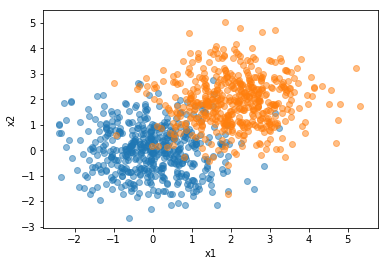

In [4]:
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')

Notre but est d'entra√Æner une r√©gression logistique pour classifier les points de coordonn√©es (x1,x2) dans l'une des deux cat√©gories en fonction des valeures de x1 et x2. Pour r√©aliser l'entra√Ænement, nous devons construire un √©chantillon unique contenant les exemples des deux cat√©gories. Pour cela, nous concat√©nons les tableaux de points ainsi que les tableaux d'√©tiquettes: 

In [5]:
sgx = np.concatenate((sgx0, sgx1))
sgy = np.concatenate((sgy0, sgy1))

print(sgx.shape, sgy.shape)

(1000, 2) (1000,)


## La fonction sigmo√Øde √† deux dimensions

La fonction sigmo√Øde, aussi appel√©e logistique, est essentielle dans les probl√®mes de classement binaires, comme discut√© en d√©tail [ici](https://thedatafrog.com/fr/regression-logistique/). Cette fonction est d√©finie comme: 

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Et voici sa forme √† une dimension:

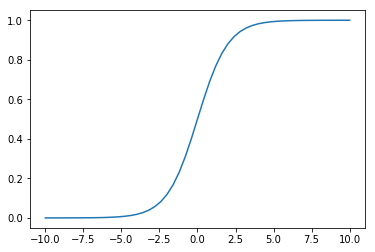

In [6]:
# d√©finition des param√®tres: 
# le biais: 
b = 0
# le poids: 
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-10,10,51)
plt.plot(linx, sigmoid(linx))

En 2D, l'expression de cette fonction reste la m√™me, mais $z$ est maintenant une fonction des deux variables $x_1$ et $x_2$, 

$$z=w_1 x_1 + w_2 x_2 + b$$

Et voici le code pour la sigmo√Øde 2D:

In [8]:
# d√©finition des param√®tres: 
# le biais: 
b = 0
# le poids de x1
w1 = 1
# le poids de x2
w2 = 2

def sigmoid_2d(x1, x2):
    # z est une fonction lin√©aire de x1 et x2
    z = w1*x1 + w2*x2 + b
    return 1 / (1+np.exp(-z))

Pour voir √† quoi cette fonction ressemble, nous pouvons faire un graphique 2D, avec x1 sur l'axe horizontal et x2 sur l'axe vertical. La valeur de la sigmo√Øde est alors repr√©sent√©e par une coleur pour chaque point (x1,x2). Pour faire cela, nous utiliserons une technique assez standard de matplotlib. Comme cette technique est un peu compliqu√©e, j'aimerais l'expliquer ici en d√©tail. 

D'abord, cr√©ons un tableau de valeurs r√©guli√®rement espac√©es suivant x1, et un autre suivant x2. Pris ensemble, ces tableaux nous permettrons de cartographier le plan (x1, x2). 

In [10]:
xmin, xmax, npoints = (-6,6,51)
linx1 = np.linspace(xmin,xmax,npoints)
# pas besoin d'un nouveau tableau, nous nous 
# contentons de r√©utiliser celui que nous avons 
# avec un nom diff√©rent: 
linx2 = linx1

Ensuite, nous cr√©ons une **meshgrid** √† partir de ces deux tableaux: 

In [11]:
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
print(gridx1.shape, gridx2.shape)
print('gridx1:')
print(gridx1) 
print('gridx2')
print(gridx2)

(51, 51) (51, 51)
gridx1:
[[-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 ...
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]]
gridx2
[[-6.   -6.   -6.   ... -6.   -6.   -6.  ]
 [-5.76 -5.76 -5.76 ... -5.76 -5.76 -5.76]
 [-5.52 -5.52 -5.52 ... -5.52 -5.52 -5.52]
 ...
 [ 5.52  5.52  5.52 ...  5.52  5.52  5.52]
 [ 5.76  5.76  5.76 ...  5.76  5.76  5.76]
 [ 6.    6.    6.   ...  6.    6.    6.  ]]


Si vous regardez la premi√®re ligne de chacun de ces deux tableaux, et que vous scannez les valeurs sur ces deux ligne, vous obtenez: `(-6,-6), (-5.76, -6), (-5.52, -6)` ... Donc nous sommes en train de scanner la coordonn√©e x1 pour la valeur la plus faible de x2, en bas du graphique. 

Si vous prenez la deuxi√®me ligne dans chaque tableau, vous obtenez: `(-6, -5.76), (-5.76, -5.76), (-5.52, -5.76)` ... Vous √™tes donc en train de scanner la deuxi√®me ligne en bas du graphique, apr√®s √™tre mont√© d'un cran en x2. 

Avec la grille compl√®te, vous scanneriez la totalit√© du graphique. 

Maintenant, nous devons calculer la valeur de la sigmo√Øde pour chaque point (x1, x2) de la grille. C'est tr√®s facile gr√¢ce √† la sortie de `meshgrid`: 

In [12]:
z = sigmoid_2d(gridx1, gridx2)
z.shape

(51, 51)

numpy appelle la fonction `sigmoid_2d` pour chaque paire `(x1, x2)` prise dans les tableaux `gridx1` et `gridx2`.

Enfin, nous pouvons tracer notre sigmo√Øde en 2D: 

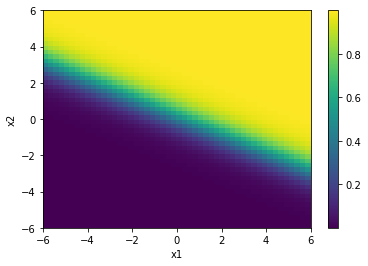

In [13]:
plt.pcolor(gridx1, gridx2, z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

La sigmo√Øde 2D a le m√™me genre de front montant que la sigmo√Øde 1D, mais en 2D. 
Avec les param√®tres d√©finis ci-dessus : 

* Le poids de $x_2$ est deux fois plus grand que le poids de $x_1$, et la sigmo√Øde √©volue donc deux fois plus vite en fonction de $x_2$. Si vous mettiez l'un des poids √† zero, pouvez-vous deviner ce qui se produirait? Vous pouvez tester en √©ditant la fonction `sigmoid_2d`, avant de r√©-ex√©cuter les cellules ci-dessus. 
* La s√©paration entre les deux cat√©gories a lieu √† $z=0$, c'est √† dire $w_1 x_1 + w_2 x_2 + b = 0$, ou encore 

$$x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} = -0.5 x_1$$

Ceci est l'√©quation d'une ligne droite. 

Vous pouvez v√©rifier sur le graphique ci-dessus que cette √©quation d√©crit bien la barri√®re de s√©paration. 

Si vous pr√©f√©rez, vous pouvez tracer la sigmo√Øde en 3D de cette fa√ßon : 

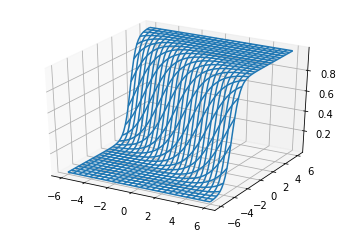

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(gridx1,gridx2,z)

## R√©gression logistique 

Nous allons maintenant entra√Æner une r√©gression logistique pour s√©parer les deux classes d'exemple. Le but de cet entra√Ænement sera d'utiliser les exemples existants pour trouver les valeurs optimales des param√®tres $w_1, w_2, b$. 

Nous prendrons l'algorithme de r√©gression logistique de scikit-learn. 
Ici, nous utilisons la m√©thode de minimisation LBFGS pour optimiser la valeur des param√®tres. Celle-ci est similaire √† la [m√©thode de Newton](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization), que vous connaissez peut-√™tre. Sinon, aucun souci, je pr√©vois un article au sujet des techniques de minimisation. 

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(sgx, sgy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

La r√©gression logistique a √©t√© ajust√©e aux donn√©es, c'est √† dire entra√Æn√©e sur les donn√©es. Maintenant, nous pouvons l'utiliser pour pr√©dire la probabilit√© qu'un point (x1,x2) appartienne √† la cat√©gorie 1. 

Nous aimerions tracer cette probabilit√© en 2D en fonction de x1 et x2. Pour cela, nous utiliserons la m√©thode `clf.predict_proba`, qui prend en entr√©e un tableau 2D de forme `(n_points,2)`. La premi√®re dimension indexe les points, et la deuxi√®me contient les valeurs de x1 et x2. Encore une fois, nous utilisons notre grille pour cartographier le plan (x1,x2). Mais les tableaux `gridx1` et `gridx2` d√©finis ci-dessus contiennent des valeurs d√©connect√©es pour x1 et x2: 

In [16]:
print(gridx1.shape, gridx2.shape)

(51, 51) (51, 51)


Ce que nous voulons, c'est un tableau 2D de forme `(n_points, 2)`, au lieu de deux tableaux de forme (51, 51)...

Nous devons donc changer la forme de ces tableaux. D'abord, nous aplatirons ces tableaux de fa√ßon √† ce que leurs valeurs apparaissent s√©quentiellement dans un tableau 1D, gr√¢ce √† la m√©thode flatten. Voici ce que fait cette m√©thode sur un exemple simple : 

In [17]:
a = np.array([[0, 1], [2, 3]])
print(a) 
print('flat array:', a.flatten())

[[0 1]
 [2 3]]
flat array: [0 1 2 3]


Ensuite, nous regrouperons ces deux tableaux sur deux colonnes avec np.c_, qui fait cela : 

In [19]:
b = np.array([[4, 5], [6, 7]])
print(a.flatten())
print(b.flatten())
c = np.c_[a.flatten(), b.flatten()]
print(c)
print(c.shape)

[0 1 2 3]
[4 5 6 7]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]
(4, 2)


Ce tableau a exactement la forme attendue par `clf.predict_proba`: une liste d'exemples avec deux valeurs. Alors allons-y, on fait pareil avec notre grille, et on calcule les probabilit√©s pour toutes les paires (x1,x2) de la grille : 

In [20]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
prob = clf.predict_proba(grid)
prob.shape

(2601, 2)

C'est fait, mais `prob` n'a pas la bonne forme pour √™tre trac√©. Ci-dessous, nous allons utiliser les deux tableaux `gridx1` et `gridx2`, de forme (51,51). La forme du tableau de probabilit√©s doit donc √©galement √™tre (51,51), car la m√©thode de trac√© fait simplement la correspondance entre chaque paire (x1,x2) et une probabilit√©. Nous devons donc changer la forme du tableau de probabilit√©s en (51,51). Le changement de forme se fait ainsi : 

In [21]:
d = np.array([0,1,2,3])
print(d)
print('reshaped to (2,2):')
print(d.reshape(2,2))

[0 1 2 3]
reshaped to (2,2):
[[0 1]
 [2 3]]


üí° **Toutes ces op√©rations de changement de forme peuvent sembler assez compliqu√©es au d√©part. Mais je vous assure que l'on finit par s'y faire. V√©rifiez toujours la forme de vos tableaux, et restez confiants!**

Enfin, nous pouvons faire notre graphique : 

Text(0, 0.5, 'x2')

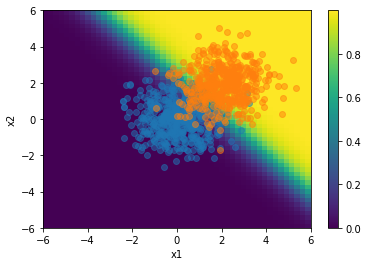

In [23]:
# notez que prob[:,1] retourne, pour tous les exemples, 
# la probabilit√© p d'appartenir √† la cat√©gorie 1.
# prob[:,0] retournerait la probabilit√© d'appartenir 
# √† la cat√©gorie 0, c'est √† dire 1-p.
plt.pcolor(gridx1,gridx2,prob[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')


Nous voyons que la r√©gression logistique s√©pare bien les deux cat√©gories. 

Mais qu'en serait-il de distributions plus compliqu√©es? 

## Un probl√®me non lin√©aire

Construisons maintenant un √©chantillon plus complexe, dans lequel :

* les exemples sont tir√©s au hasard suivant une distribution uniforme dans le plan (x1,x2)
* un exemple est mis dans la cat√©gorie 0 si le produit x1*x2 est positif, et dans la cat√©gorie 1 dans le cas contraire.

Nous tracerons la distribution de cette √©chantillon plus bas, pour que ce soit plus clair. 

In [24]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)

In [25]:
# les valeurs de x1 et x2 sont regroup√©es
# dans un tableau de forme (nexamples, 2)
# ce tableau contient les exemples des 2 cat√©gories, 
# c'est √† dire tout les exemples du plan
srx = np.column_stack((x1, x2))
# selection des exemples pour la cat√©gorie 0 
srx0 = srx[x1*x2>=0]
# et pour la cat√©gorie 1
srx1 = srx[x1*x2<0]

Text(0, 0.5, 'x2')

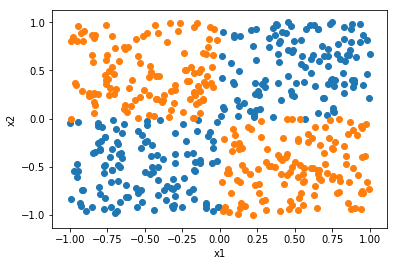

In [26]:
plt.scatter(srx0[:,0],srx0[:,1])
plt.scatter(srx1[:,0],srx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

Il est √©vident que nous ne pouvons pas tracer de ligne s√©parant les deux cat√©gories avec pr√©cision. 
La r√©gression logistique n'est donc plus du tout adapt√©e! 

**C'est un probl√®me non-lin√©aire**. 

Pour pouvoir prendre en compte les non-lin√©arit√©s, la fronti√®re de classification doit √™tre une fonction non lin√©aire des variables d'entr√©e x1 et x2. Cela veut dire que l'entr√©e pond√©r√©e $z$ du dernier neurone doit √™tre une fonction non lin√©aire de x1 et x2. 

Pour cela, nous allons essayer deux approches: 

* un changement de variables, ce qui n√©cessite une intuition sur la densit√© de probabilit√© sous-jacente de l'√©chantillon
* utiliser un mod√®le plus complexe, comme un r√©seau de neurones avec au moins une couche cach√©e. 

## Changement de variables

Nous allons tout d'abord tenter un changement de variables. En regardant le graphique ci-dessus (et aussi le code utilis√© pour engendrer les exemples!), nous voyons que la cat√©gorisation est fonction du produit $x_1 x_2$. 

En effet, pour la premi√®re cat√©gorie, ($x_1 > 0$ and $x_2 > 0$), or ($x_1 < 0$ and $x_2 < 0$). Donc le produit $x_1 x_2$ est toujours positif. Pour la deuxi√®me cat√©gorie, ce produit est toujours n√©gatif. 

Donc, au lieu de consid√©rer $x_1$ et $x_2$ s√©par√©ment, nous travaillerons avec $u= x_1 x_2$, qui est une combinaison non lin√©aire de $x_1$ et $x_2$. 

Nous construisons nos exemples en fonction de $u$:

Text(0, 0.5, 'category')

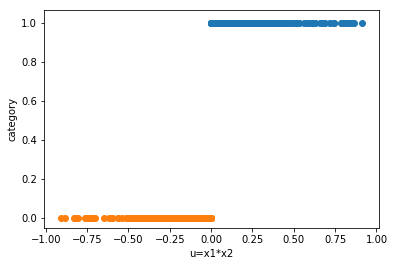

In [27]:
# cat√©gorie 0: 
# pour tous les exemples, nous prenons le produit x1*x2 
sru0 = srx0[:,0] * srx0[:,1]
# et nous assignons l'√©tiquette 1 
sry0 = np.ones(len(sru0))
# cat√©gorie 1: 
sru1 = srx1[:,0] * srx1[:,1]
sry1 = np.zeros(len(sru1))
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)
plt.xlabel('u=x1*x2')
plt.ylabel('category')

Et nous pouvons faire une simple r√©gression logistique √† 1D, avec $u$ comme entr√©e:


In [28]:
# on concat√®ne les exemples des deux cat√©gories: 
sru = np.concatenate((sru0, sru1))
# on change la forme du tableau r√©sultant en 
# (nexamples, 1), de fa√ßon √† ce que scikit-learn
# puisse l'utiliser
sru = np.c_[sru]
# on concat√®ne les √©tiquettes des deux cat√©gories
sry = np.concatenate((sry0, sry1))
# on cr√©e la r√©gression logistique, et on entra√Æne: 
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sru, sry)

Tra√ßons d'abord le r√©sultat en fonction de u. √Ä ce stade, les operations de changement de forme doivent √™tre assez claires pour vous, car nous les avons utilis√©es ci-dessus en 2D. Sinon, n'h√©sitez pas √† rajouter des commandes dans les cellules de code ci-dessous pour imprimer la forme des diff√©rents tableaux.  

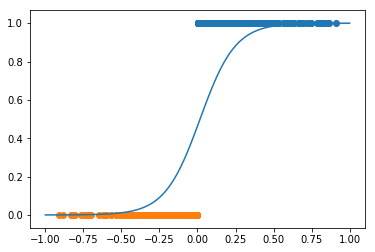

In [29]:
linx = np.c_[np.linspace(-1, 1, 100)]
prob = clf.predict_proba(linx)
prob = prob[:,1].reshape(len(linx))
plt.plot(linx, prob)
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)

Et maintenant, tra√ßons le r√©sultat en fonction de $x_1$ et $x_2$ : 

In [30]:
xmin, xmax, npoints = -1, 1, 100
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
gridu = gridx1 * gridx2
us = np.c_[gridu.flatten()]
probs = clf.predict_proba(us)
probs[:,1].shape

(10000,)

Text(0, 0.5, 'x2')

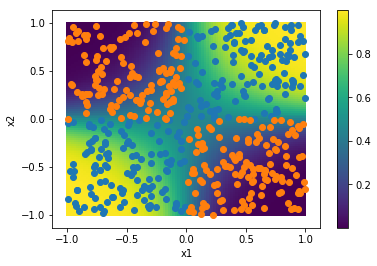

In [31]:
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(srx0[:,0], srx0[:,1])
plt.scatter(srx1[:,0], srx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

Le classement fonctionne bien dans ce cas simple, mais: 

* Suivant le probl√®me, la relation entre les deux variables peut √™tre tr√®s compliqu√©e, et difficile √† deviner. 
* C'est encore pire √† plus de deux dimensions.

Il est plus facile de complexifier notre mod√®le, de fa√ßon √† ce qu'il puisse s'adapter aux non-lin√©arit√©s par lui-m√™me. C'est ce que nous allons faire maintenant. 

## Le r√©seau de neurones √† couches cach√©e: un classificateur non lin√©aire

Nous allons maintenant construire un r√©seau de neurones simple pour classer nos exemples. 

Mais avant cela, nous devons concat√©ner les exemples des deux cat√©gories en un √©chantillon unique : 

In [33]:
srx = np.concatenate((srx0,srx1))
sry = np.concatenate((sry0,sry1))

Le r√©seau de neurones sera un MLPClassifier de scikit-learn, avec une seule couche cach√©e contenant 50 neurones (rappelez-vous: toujours commencer petit). 

Pour ces neurones, nous utiliserons une ReLU comme fonction d'activation, car celle-ci fonctionne toujours bien pour les neurones des couches cach√©es. Vous pourrez essayer de la remplacer par une activation logistique (sigmo√Øde) plus tard si vous le souhaitez. L'apprentissage est un processus it√©ratif, et le nombre d'it√©rations maximum par d√©faut (200) n'√©tait pas suffisant pour atteindre la convergence. Je l'ai donc mis √† 10 000.

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), activation='relu', max_iter=10000)

mlp.fit(srx,sry)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Pour √©valuer les performances, nous devons construire un √©chantillon de test, comme nous l'avons fait pour l'√©chantillon d'entra√Ænement : 

In [36]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)
x = np.column_stack((x1, x2))
xt0 = x[x1*x2>0]
xt1 = x[x1*x2<0]
yt0 = np.ones(len(xt0))
yt1 = np.zeros(len(xt1))
xt = np.c_[np.concatenate((xt0,xt1))]
yt = np.concatenate((yt0,yt1))
print(xt.shape)

(500, 2)


Nous pouvons alors calculer la pr√©cision, qui est la probabilit√© de classer correctement les exemples de l'√©chantillon de test: 

In [37]:
from sklearn.metrics import accuracy_score
# predict the category for all test examples
predictions = mlp.predict(xt)
# compare the predictions to the true categories,
# and compute the accuracy:
accuracy_score(yt, predictions)

0.986

Les performances sont excellentes! Tra√ßons maintenant la probabilit√© d'appartenir √† la cat√©gorie 1 en 2D, ainsi que l'√©chantillon de test : 

Text(0, 0.5, 'x2')

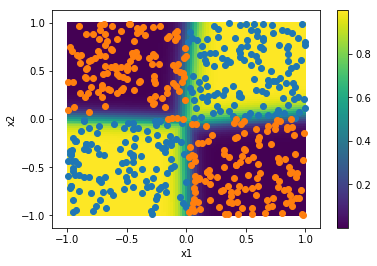

In [38]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
probs = mlp.predict_proba(grid)
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(xt0[:,0], xt0[:,1])
plt.scatter(xt1[:,0], xt1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')


Ce r√©seau de neurones simple parvient tr√®s bien √† d√©crire les non-lin√©arit√©s de cet √©chantillon. 

Mais comment peut-il faire √ßa? en quoi les couches cach√©es sont-elles reli√©es √† la non-lin√©arit√©? 

## Discussion

D'abord, souvenez vous que lorsqu'il n'y a pas de couche cach√©e, la sortie du r√©seau de neurones est simplement: 

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

avec 

$$z = w_1 x_1 + w_2 x_2 + b$$

Donc la barri√®re de s√©paration, qui est le lieu o√π $\sigma(z)=0.5$, se produit pour $z=0$, ou encore pour 

$$w_1 x_1 + w_2 x_2 + b = 0$$

C'est une √©quation lin√©aire d√©crivant une droite dans le plan $(x_1,x_2)$. Pour introduire des non lin√©arit√©s, nous devons faire en sorte que $z$ soit une fonction non lin√©aire de $x_1$ et $x_2$.

C'est ce que nous avons tout d'abord fait en changeant de variables pour utiliser 

$$z= wu + b = w x_1 x_2 + b$$

Dans un r√©seau de neurones √† couche cach√©e, $z$ est une fonction des sorties des neurones de la couche cach√©e. 
Ici, nous avons utilis√© comme fonction d'activation pour ces neurones une ReLU qui ressemble √† √ßa √† une dimension:

Text(0, 0.5, 'ReLU(x)')

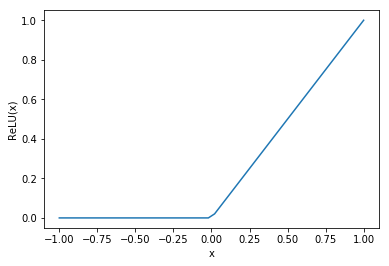

In [39]:
x = np.linspace(-1,1)
# x*(x>0) is equal to x for x>0
# and to 0 otherwise
plt.plot(x, x*(x>0))
plt.xlabel('x')
plt.ylabel('ReLU(x)')

√Ä deux dimensions, la ReLU aurait l'air d'un plan montant d√©marrant sur une certaine ligne dans le plan $(x_1,x_2)$. La non-lin√©arit√© vient de la discontinuit√© √† $x=0$. La sortie des neurones ReLU est donc une fonction non-lin√©aire de $x_1$ et $x_2$, et toute fonction de ces sorties sera √©galement une fonction non lin√©aire de $x_1$ et $x_2$.

üí°**Pour rendre un r√©seau de neurones non lin√©aire, il suffit d'y mettre au moins une couche cach√©e avec une fonction d'activation non lin√©aire, telle qu'une ReLU ou une sigmo√Øde. 

Maintenant, [concluons!](https://thedatafrog.com/regression-logistique-reseau-neurones#wrapup)